# Emotion Prediction from RGB Data Using CNN

This Jupyter Notebook demonstrates how to predict emotions from RGB data using a Convolutional Neural Network (CNN) in Keras. We will use dummy data generated to simulate RGB values associated with different emotional states.

## Table of Contents
1. Importing Libraries
2. Loading and Preparing the Data
3. Data Preprocessing
4. Building the CNN Model
5. Training the Model
6. Evaluating the Model
7. Conclusion and Further Steps

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten

## 2. Loading and Preparing the Data

In [2]:
# Load the data
df = pd.read_csv('dummy_data.csv')
print(df.head())

       rgb1      rgb2      rgb3       emotion
0  0.674510  0.184314  0.458824       excited
1  0.752941  0.262745  0.984314        joyful
2  0.764706  0.403922  0.035294     depressed
3  0.827451  0.082353  0.949020        amused
4  0.141176  0.341176  0.274510  disappointed


## 3. Data Preprocessing

In [4]:
# Normalize RGB values already done in the script generating the data
from sklearn.preprocessing import OneHotEncoder

# Encode emotion labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(df[['emotion']].values)

# Reshape data for Conv1D
X = df[['rgb1', 'rgb2', 'rgb3']].values.reshape(-1, 3, 1)

X.plot()

## 4. Building the CNN Model

In [5]:
# Define the CNN model
model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(3, 1)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output layer matches number of emotions
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


## 5. Training the Model


In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0424 - loss: 2.9998 - val_accuracy: 0.0800 - val_loss: 2.9922
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0620 - loss: 2.9926 - val_accuracy: 0.0800 - val_loss: 2.9932
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0608 - loss: 2.9894 - val_accuracy: 0.0750 - val_loss: 2.9936
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0714 - loss: 2.9883 - val_accuracy: 0.0700 - val_loss: 2.9947
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0601 - loss: 2.9875 - val_accuracy: 0.0750 - val_loss: 2.9954
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0592 - loss: 2.9837 - val_accuracy: 0.0700 - val_loss: 2.9968
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0568 - loss: 2.9844 - val_accuracy: 0.0650 - val_loss: 2.9982
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0765 - loss: 2.9810 - val_accuracy: 0.0750 - val_loss

## 6. Evaluating the Model

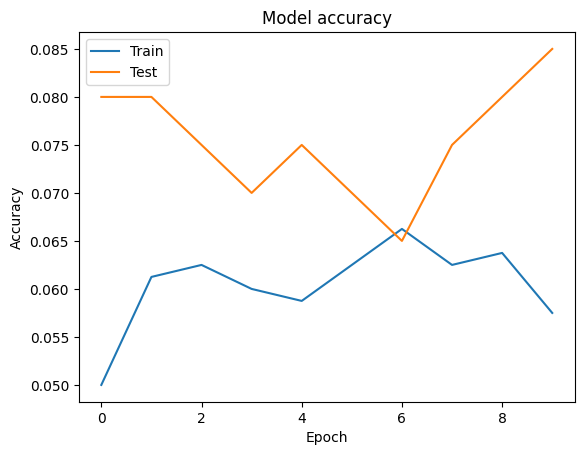

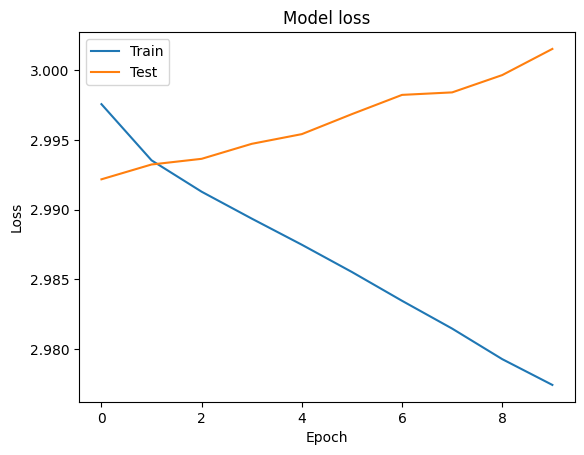

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## 7. Conclusion and Further Steps
